In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE),
   # color_mode='',
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 2 2 0 2 0 0 1 1 2 1 0 1 0 0 2]


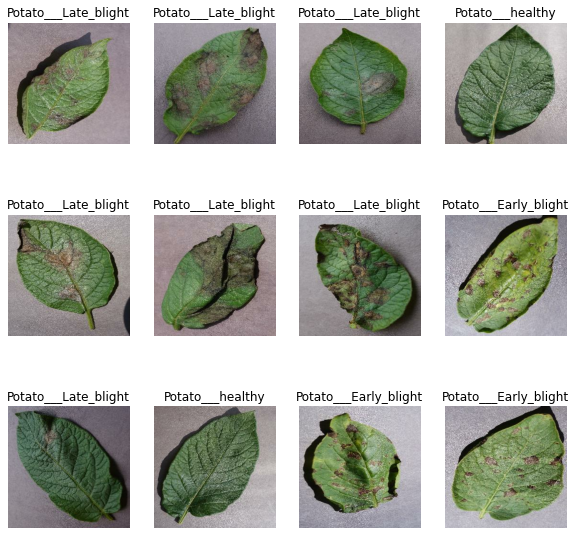

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54)
len(train_ds)

54

In [11]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds,test_ds

In [16]:
train_ds, val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [21]:
resize_rescale = tf. keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf. keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.Rescaling(0.2)
])

In [23]:
shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
    
])
model.build(input_shape=shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history=model.fit(
train_ds,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 88s 2s/step - loss: 0.8950 - accuracy: 0.5145 - val_loss: 0.7984 - val_accuracy: 0.5938
Epoch 2/10
54/54 [==============================] - 78s 1s/step - loss: 0.6364 - accuracy: 0.7459 - val_loss: 0.5207 - val_accuracy: 0.7812
Epoch 3/10
54/54 [==============================] - 77s 1s/step - loss: 0.4558 - accuracy: 0.8148 - val_loss: 0.5150 - val_accuracy: 0.8021
Epoch 4/10
54/54 [==============================] - 78s 1s/step - loss: 0.3891 - accuracy: 0.8472 - val_loss: 0.3606 - val_accuracy: 0.8594
Epoch 5/10
54/54 [==============================] - 78s 1s/step - loss: 0.3666 - accuracy: 0.8501 - val_loss: 0.3721 - val_accuracy: 0.8490
Epoch 6/10
54/54 [==============================] - 78s 1s/step - loss: 0.3325 - accuracy: 0.8704 - val_loss: 0.3669 - val_accuracy: 0.8490
Epoch 7/10
54/54 [==============================] - 79s 1s/step - loss: 0.2991 - accuracy: 0.8756 - val_loss: 0.3670 - val_accuracy: 0.8750
Epoch 8/10
54/54 [==

In [27]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 6s 511ms/step - loss: 0.2038 - accuracy: 0.9258


In [28]:
scores

[0.20375525951385498, 0.92578125]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
history.history['accuracy']

[0.5144675970077515,
 0.7459490895271301,
 0.8148148059844971,
 0.8472222089767456,
 0.8501157164573669,
 0.8703703880310059,
 0.8755787014961243,
 0.8923611044883728,
 0.8993055820465088,
 0.9068287014961243]

In [40]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Traning and Validation Losses')

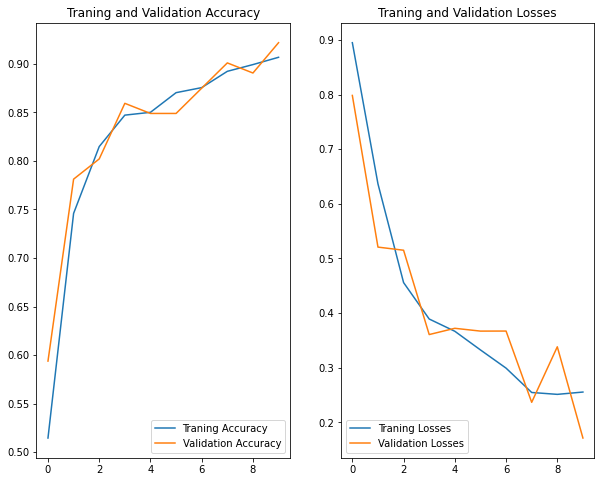

In [57]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Traning Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Traning and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Traning Losses')
plt.plot(range(EPOCHS),val_loss,label='Validation Losses')
plt.legend(loc='lower left')
plt.title('Traning and Validation Losses')

Actual Label:  Potato___Late_blight
1/1 [==============================] - 1s 700ms/step
Predicted Label:  Potato___Late_blight 96.63


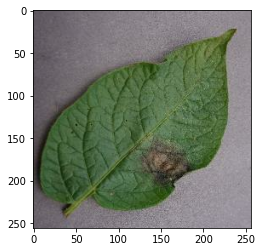

In [95]:

for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype("uint8")
    first_label=label_batch[0].numpy()
    
    plt.imshow(first_image)
    print("Actual Label: ",class_names[first_label])
    
    batch_prediction=model.predict(image_batch)
    confidence = round(100 * (np.max(batch_prediction[0])), 2)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])],confidence)
    

In [90]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 70ms/step


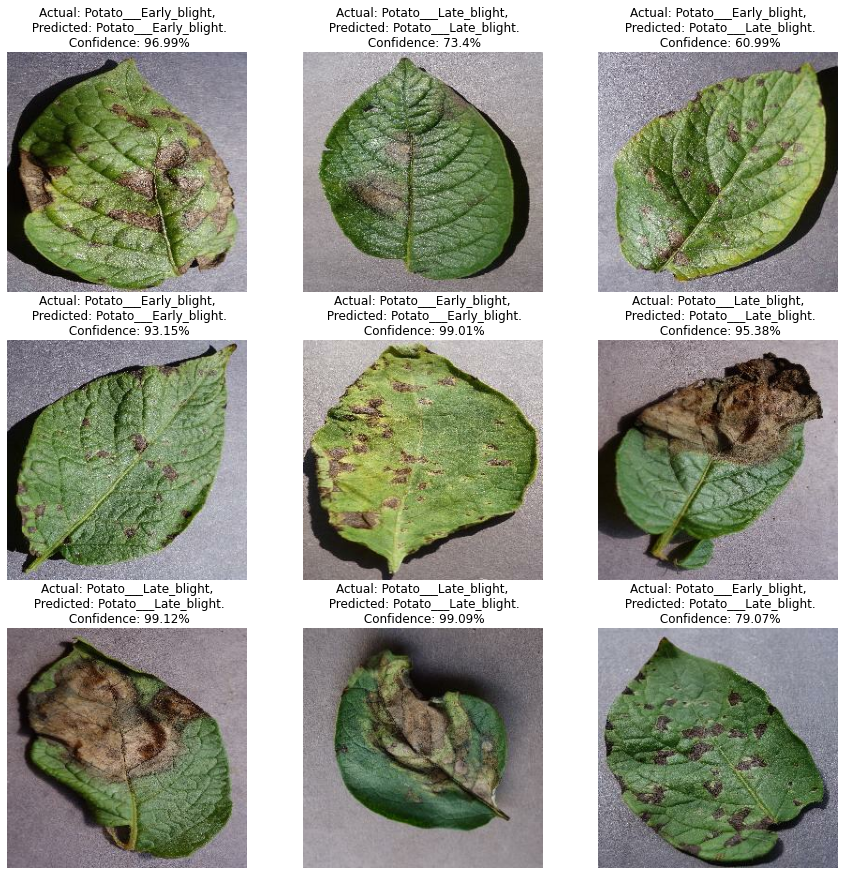

In [93]:
plt.figure(figsize=(15,15))
for images,label in test_ds.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_class=class_names[label[i]]
        predicted_class, confidence = predict(model,images[i].numpy())
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
        
        
        
        

1/1 [==============================] - 0s 463ms/step


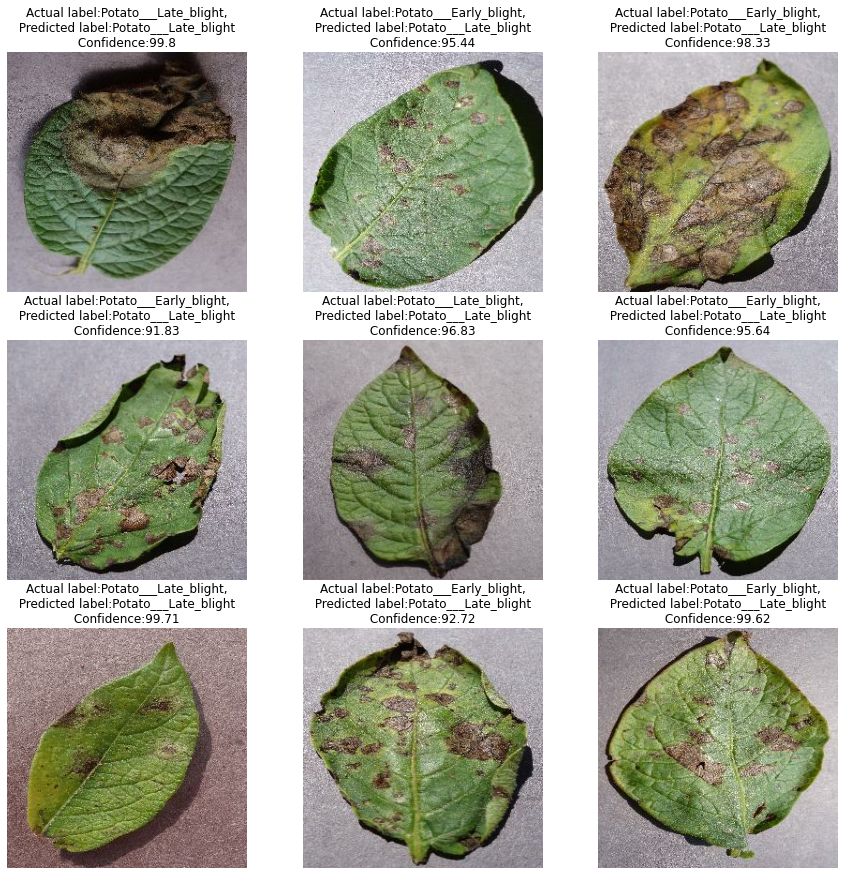

In [129]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in test_ds.take(1):
    for i in range(9):
        image=image_batch[i].numpy().astype("uint8")
        label=label_batch[i].numpy()
        plt.subplot(3,3,i+1)
        plt.imshow(image)
        
        actual_label=class_names[label]
        
        batch_prediction=model.predict(image_batch)
        confidence = round(100 * (np.max(batch_prediction[i])), 2)
        predicted_label=class_names[np.argmax(batch_prediction[0])]

        plt.title(f"Actual label:{actual_label},\n Predicted label:{predicted_label} \n Confidence:{confidence} ")
        plt.axis("off")


In [26]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
